# Example usage of LookUpData, CompositionEntry, and OxidationStateGuesser

In [40]:
from data.utils.look_up_data import LookUpData

# Try to look up the data
lookup_data = LookUpData()
lookup_data.load_property('BoilingT')

array([2.0130e+01, 4.0700e+00, 1.6150e+03, 2.7430e+03, 4.2730e+03,
       4.3000e+03, 7.7210e+01, 9.0100e+01, 8.4880e+01, 2.6920e+01,
       1.1560e+03, 1.3630e+03, 2.7920e+03, 3.1730e+03, 5.5350e+02,
       7.1772e+02, 2.3896e+02, 8.7200e+01, 1.0320e+03, 1.7570e+03,
       3.1030e+03, 3.5600e+03, 3.6800e+03, 2.9440e+03, 2.3340e+03,
       3.1340e+03, 3.2000e+03, 3.1860e+03, 3.2000e+03, 1.1800e+03,
       2.4770e+03, 3.0930e+03, 8.8700e+02, 9.5800e+02, 3.3200e+02,
       1.1978e+02, 9.6100e+02, 1.6550e+03, 3.6180e+03, 4.6820e+03,
       5.0170e+03, 4.9120e+03, 4.5380e+03, 4.4230e+03, 3.9680e+03,
       3.2360e+03, 2.4350e+03, 1.0400e+03, 2.3450e+03, 2.8750e+03,
       1.8600e+03, 1.2610e+03, 4.5730e+02, 1.6500e+02, 9.4400e+02,
       2.1430e+03, 3.7370e+03, 3.6330e+03, 3.5630e+03, 3.3730e+03,
       3.2730e+03, 2.0760e+03, 1.8000e+03, 3.5230e+03, 3.5030e+03,
       2.8400e+03, 2.9730e+03, 3.1410e+03, 2.2230e+03, 1.4690e+03,
       3.6750e+03, 4.8760e+03, 5.7310e+03, 5.8280e+03, 5.8690e

In [41]:
from data.utils.composition import CompositionEntry

entry = CompositionEntry()
entry.parse_composition('O,3.0,Pu,2.0') # Parse the composition

{7: 3.0, 93: 2.0}

In [42]:
from data.utils.oxstate import OxidationStateGuesser
from data.utils.composition import CompositionEntry
from data.utils.look_up_data import LookUpData

ox_guesser = OxidationStateGuesser()
en = LookUpData.load_property("Electronegativity")
ox_guesser.set_electronegativity(en)
ox = LookUpData.load_property("OxidationStates")
ox_guesser.set_oxidationstates(ox)

entry = CompositionEntry("Na2CO3")
possible_states = ox_guesser.get_possible_states(entry)
print(possible_states)

[[ 1.  4. -2.]]


# Four main attributes
- **Stoichiometric attributes** that depend only on the fractions of elements present and not what those elements actually are. These include the number of elements present in the compound and several Lp norms of the fractions. 
- **Elemental property statistics**, which are defined as the mean, mean absolute deviation, range, minimum, maximum and mode of 22 different elemental properties. This category includes attributes such as the maximum row on periodic table, average atomic number and the range of atomic radii between all elements present in the material. 
- **Electronic structure attributes**, which are the average fraction of electrons from the s, p, d and f valence shells between all present elements. These are identical to the attributes used by Meredig et al.
- **Ionic compound attributes** that include whether it is possible to form an ionic compound assuming all elements are present in a single oxidation state, and two adaptations of the fractional ‘ionic character’ of a compound based on an electronegativitybased measure.

In [43]:
from generator.stoichiometric import StoichiometricAttributeGenerator

# Generate the attributes
attribute_generator = StoichiometricAttributeGenerator()
attributes = attribute_generator.generate_features([CompositionEntry("Na2CO3")])

print(attributes)

# NComp means number of components, and Comp_LNNorm means the normalized LN norm of the composition vector

   NComp  Comp_L2Norm  Comp_L3Norm  Comp_L5Norm  Comp_L7Norm  Comp_L10Norm
0      3      0.62361     0.550321     0.512897      0.50411      0.500861


In [44]:
from generator.ionic import IonicityAttributeGenerator

attribute_generator = IonicityAttributeGenerator()
attributes = attribute_generator.generate_features([CompositionEntry("Na2CO3"), CompositionEntry("CO2"), CompositionEntry("KCl")])

print(attributes)

   CanFormIonic  MaxIonicChar  MeanIonicChar
0             1      0.792998       0.347733
1             1      0.179651       0.079845
2             1      0.745613       0.372807


In [45]:
from generator.element import ElementalPropertyAttributeGenerator

attribute_generator = ElementalPropertyAttributeGenerator()
attributes = attribute_generator.generate_features([CompositionEntry("Na2CO3"), CompositionEntry("CO2"), CompositionEntry("KCl")])

print(attributes)

   mean_Number  maxdiff_Number  dev_Number  max_Number  min_Number  \
0     8.666667             5.0    1.555556        11.0         6.0   
1     7.333333             2.0    0.888889         8.0         6.0   
2    18.000000             2.0    1.000000        19.0        17.0   

   most_Number  mean_MendeleevNumber  maxdiff_MendeleevNumber  \
0          8.0             57.000000                     85.0   
1          8.0             83.666667                     10.0   
2         18.0             48.500000                     91.0   

   dev_MendeleevNumber  max_MendeleevNumber  ...  dev_GSmagmom  max_GSmagmom  \
0            36.666667                 87.0  ...           0.0           0.0   
1             4.444444                 87.0  ...           0.0           0.0   
2            45.500000                 94.0  ...           0.0           0.0   

   min_GSmagmom  most_GSmagmom  mean_SpaceGroupNumber  \
0           0.0            0.0             114.666667   
1           0.0        

In [46]:
from generator.charge import ChargeDependentAttributeGenerator

attribute_generator = ChargeDependentAttributeGenerator()
attributes = attribute_generator.generate_features([CompositionEntry("Na2CO3"), CompositionEntry("CO2"), CompositionEntry("KCl")])

print(attributes)

   min_Charge  max_Charge  maxdiff_Charge  mean_Charge  var_Charge  \
0        -2.0         4.0             6.0     2.000000    0.666667   
1        -2.0         4.0             6.0     2.666667    0.888889   
2        -1.0         1.0             2.0     1.000000    0.000000   

   CumulativeIonizationEnergy  CumulativeElectronAffinity  \
0                   52.767817                       282.0   
1                  148.025300                       282.0   
2                    4.340663                       349.0   

   AnionCationElectronegativityDiff  
0                              1.97  
1                              0.89  
2                              2.34  


# Machine Learning Model

In [47]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
import numpy as np


In [48]:
def read_data(file_path):
    # Define column names
    column_names = [
        'name', 'bandgap', 'energy_pa', 'volume_pa', 'magmom_pa', 
        'fermi', 'hull_distance', 'delta_e'
    ]
    
    # Read the data
    data = pd.read_csv(file_path, delim_whitespace=True, names=column_names, skiprows=1)
    
    # Handle missing values
    data.replace('None', np.nan, inplace=True)
    data = data.apply(pd.to_numeric, errors='ignore')
    
    return data

# Usage
file_path = './data/datasets/small_set.txt'
data = read_data(file_path)
print(data.head())

                    name  bandgap  energy_pa  volume_pa  magmom_pa     fermi  \
0          O,3.0,Pu,2.0,    1.937 -11.172604  14.962000   2.000000  9.101894   
1  Mg,2.0,Nd,4.0,Cu,4.0,    0.000  -3.888190  22.624000   0.000000  3.806029   
2   Cr,1.0,O,4.0,Sr,2.0,    0.000  -6.717626  12.734286   0.285714  3.029596   
3           I,6.0,Y,2.0,    3.101  -4.194372  46.803750   0.000000  0.639353   
4         Mn,2.0,Sn,4.0,    0.000  -5.666459  19.375000   0.715772  9.296684   

   hull_distance   delta_e  
0      -0.496022 -3.626996  
1      -0.029635 -0.202533  
2      -0.029047 -2.721397  
3      -1.131080 -1.577544  
4      -0.053667 -0.053667  


In [49]:
# Process the data
# Use the Stoichoimetric Attribute, Ionicity Attribute, Elemental Property Attribute, and Charge Dependent Attribute as features
# Use bandgap, energy_pa, volume_pa, magmom_pa, fermi, hull_distance, and delta_e as targets

from generator.stoichiometric import StoichiometricAttributeGenerator
from generator.ionic import IonicityAttributeGenerator
from generator.element import ElementalPropertyAttributeGenerator
from generator.charge import ChargeDependentAttributeGenerator

# Generate the features
stoichiometric_generator = StoichiometricAttributeGenerator()
ionicity_generator = IonicityAttributeGenerator()
elemental_generator = ElementalPropertyAttributeGenerator()
charge_generator = ChargeDependentAttributeGenerator()

In [50]:
chemical = CompositionEntry("O,3.0,Pu,2.0,")
stoichiometric_features = stoichiometric_generator.generate_features([chemical])
ionicity_features = ionicity_generator.generate_features([chemical])
elemental_features = elemental_generator.generate_features([chemical])
charge_features = charge_generator.generate_features([chemical])
print(stoichiometric_features)
print(ionicity_features)
print(elemental_features)
# print(charge_features)

   NComp  Comp_L2Norm  Comp_L3Norm  Comp_L5Norm  Comp_L7Norm  Comp_L10Norm
0      2      0.72111     0.654213      0.61503     0.604895      0.601032
   CanFormIonic  MaxIonicChar  MeanIonicChar
0             1      0.688514       0.330487
   mean_Number  maxdiff_Number  dev_Number  max_Number  min_Number  \
0         42.4            86.0       41.28        94.0         8.0   

   most_Number  mean_MendeleevNumber  maxdiff_MendeleevNumber  \
0          8.0                  61.8                     63.0   

   dev_MendeleevNumber  max_MendeleevNumber  ...  dev_GSmagmom  max_GSmagmom  \
0                30.24                 87.0  ...      0.152642      0.318004   

   min_GSmagmom  most_GSmagmom  mean_SpaceGroupNumber  \
0           0.0            0.0                   11.6   

   maxdiff_SpaceGroupNumber  dev_SpaceGroupNumber  max_SpaceGroupNumber  \
0                       1.0                  0.48                  12.0   

   min_SpaceGroupNumber  most_SpaceGroupNumber  
0           

	Pu: +3.0


In [51]:
import os

features = []
for i in range(len(data)):
    entry = CompositionEntry(data['name'][i])
    stoichiometric = np.array(stoichiometric_generator.generate_features([entry])).flatten()
    ionicity = np.array(ionicity_generator.generate_features([entry])).flatten()
    elemental = np.array(elemental_generator.generate_features([entry])).flatten()
    # charge = np.array(charge_generator.generate_features([entry])).flatten()
    
    # feature = np.concatenate([stoichiometric, ionicity, elemental, charge])
    feature = np.concatenate([stoichiometric, ionicity, elemental])
    features.append(feature)

features = np.array(features)

current_dir = os.getcwd()

# Save features to /tmp/features.csv
np.savetxt(current_dir + "/tmp/features.csv", features, delimiter=",")

# features = features[~mask] # Remove the rows with missing values

In [52]:
# target = data[['bandgap', 'energy_pa', 'volume_pa', 'magmom_pa', 'fermi', 'hull_distance', 'delta_e']].values
target = data[['bandgap', 'energy_pa', 'volume_pa', 'magmom_pa', 'fermi', 'delta_e']].values
np.savetxt(current_dir + "/tmp/target.csv", target, delimiter=",")

In [53]:
features = pd.read_csv(current_dir + "/tmp/features.csv", header=None)
targets = pd.read_csv(current_dir + "/tmp/target.csv", header=None)

# Convert features and targets to PyTorch tensors
features = torch.tensor(features.values, dtype=torch.float32)
targets = torch.tensor(targets.values, dtype=torch.float32)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train[0])
print(y_train[0])

torch.Size([504, 141]) torch.Size([504, 6])
torch.Size([126, 141]) torch.Size([126, 6])
tensor([2.0000e+00, 8.2462e-01, 8.0415e-01, 8.0016e-01, 8.0001e-01, 8.0000e-01,
        0.0000e+00, 1.8700e-01, 5.9840e-02, 1.5800e+01, 5.4000e+01, 1.7280e+01,
        5.9000e+01, 5.0000e+00, 5.0000e+00, 6.1000e+01, 5.5000e+01, 1.7600e+01,
        7.2000e+01, 1.7000e+01, 7.2000e+01, 3.6830e+01, 1.3010e+02, 4.1631e+01,
        1.4091e+02, 1.0811e+01, 1.0811e+01, 2.1192e+03, 1.1440e+03, 3.6608e+02,
        2.3480e+03, 1.2040e+03, 2.3480e+03, 1.1000e+01, 1.0000e+01, 3.2000e+00,
        1.3000e+01, 3.0000e+00, 1.3000e+01, 2.8000e+00, 4.0000e+00, 1.2800e+00,
        6.0000e+00, 2.0000e+00, 2.0000e+00, 1.0780e+02, 1.1900e+02, 3.8080e+01,
        2.0300e+02, 8.4000e+01, 8.4000e+01, 1.8580e+00, 9.1000e-01, 2.9120e-01,
        2.0400e+00, 1.1300e+00, 2.0400e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 8.0000e-01, 1.0000e+00, 3.2000e-01,
        1.0000e+00, 0.0000e+00, 

In [54]:
# # Define the neural network architecture
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(X_train.shape[1], 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 32)
#         self.fc4 = nn.Linear(32, y_train.shape[1])
    
#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x

In [55]:
# from model.simple_model import Net
# from model.simple_model_revised import Net
from model.simple_model_residue import Net
# from model.model import Net
# from model.residue import Net

input dim 141, output dim 6
Epoch [10/1000], Loss: 16.2752
Epoch [20/1000], Loss: 7.3805
Epoch [30/1000], Loss: 4.8597
Epoch [40/1000], Loss: 4.0096
Epoch [50/1000], Loss: 3.3498
Epoch [60/1000], Loss: 2.9364
Epoch [70/1000], Loss: 2.6226
Epoch [80/1000], Loss: 2.3628
Epoch [90/1000], Loss: 2.1466
Epoch [100/1000], Loss: 1.9987
Epoch [110/1000], Loss: 1.8385
Epoch [120/1000], Loss: 1.7118
Epoch [130/1000], Loss: 1.6239
Epoch [140/1000], Loss: 1.5322
Epoch [150/1000], Loss: 1.4771
Epoch [160/1000], Loss: 1.4728
Epoch [170/1000], Loss: 1.3328
Epoch [180/1000], Loss: 1.2745
Epoch [190/1000], Loss: 1.3279
Epoch [200/1000], Loss: 1.1960
Epoch [210/1000], Loss: 1.1636
Epoch [220/1000], Loss: 1.1853
Epoch [230/1000], Loss: 1.1323
Epoch [240/1000], Loss: 1.0886
Epoch [250/1000], Loss: 1.0028
Epoch [260/1000], Loss: 1.0478
Epoch [270/1000], Loss: 1.0345
Epoch [280/1000], Loss: 0.9276
Epoch [290/1000], Loss: 0.9147
Epoch [300/1000], Loss: 1.0786
Epoch [310/1000], Loss: 0.9086
Epoch [320/1000], L

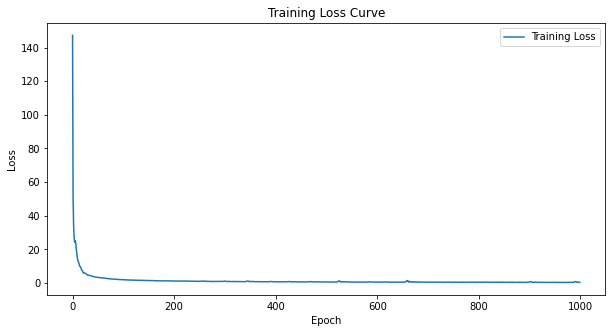

In [56]:
import matplotlib.pyplot as plt

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
print("input dim {}, output dim {}".format(input_dim, output_dim))
model = Net(input_dim, output_dim)
# model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    mse = criterion(predictions, y_test).item()
    print(f'Mean Squared Error: {mse}')

# Save the trained model
torch.save(model.state_dict(), current_dir + '/model/' + 'trained_model.pth')

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), losses, label='Training Loss')
plt.xlabel('Epoch')
# plt.yscale('log')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [57]:
# model = Net()
# model.load_state_dict(torch.load(current_dir + '/model/' + 'trained_model.pth'))

# # Make predictions
# model.eval()
# with torch.no_grad():
#     entry = CompositionEntry("Y2I6")
#     stoichiometric = np.array(stoichiometric_generator.generate_features([entry])).flatten()
#     ionicity = np.array(ionicity_generator.generate_features([entry])).flatten()
#     elemental = np.array(elemental_generator.generate_features([entry])).flatten()
#     # charge = np.array(charge_generator.generate_features([entry])).flatten()
    
#     # feature = np.concatenate([stoichiometric, ionicity, elemental, charge])
#     feature = np.concatenate([stoichiometric, ionicity, elemental])
#     feature = torch.tensor(feature, dtype=torch.float32)
#     prediction = model(feature)
#     print(prediction)

# # 'bandgap', 'energy_pa', 'volume_pa', 'magmom_pa', 'fermi', 'delta_e'

In [58]:
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
model = Net(input_dim, output_dim)
model.load_state_dict(torch.load(current_dir + '/model/' + 'trained_model.pth'))

# Make predictions
model.eval()
with torch.no_grad():
    entry = CompositionEntry("Y2I6")
    stoichiometric = np.array(stoichiometric_generator.generate_features([entry])).flatten()
    ionicity = np.array(ionicity_generator.generate_features([entry])).flatten()
    elemental = np.array(elemental_generator.generate_features([entry])).flatten()
    # charge = np.array(charge_generator.generate_features([entry])).flatten()
    
    # feature = np.concatenate([stoichiometric, ionicity, elemental, charge])
    feature = np.concatenate([stoichiometric, ionicity, elemental])
    feature = torch.tensor(feature, dtype=torch.float32).unsqueeze(0)  # Add this line to fix the error
    prediction = model(feature)
    print(prediction)

# 'bandgap', 'energy_pa', 'volume_pa', 'magmom_pa', 'fermi', 'delta_e'

tensor([[ 2.2521, -4.0210, 46.8096, -0.0539,  1.6504, -2.2120]])
